#         SÉRIES TEMPORAIS EM PYTHON

In [1]:
#importação de bibliotecas
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [2]:
#carregando os dados AirPassengers 
dataset = pd.read_csv('AirPassengers.csv')
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


##### AirPassengers é um conjunto de dados de Números Mensais de passageiros dos Estados Unidos do ano 1949-1960.

In [3]:
print(dataset.dtypes)

Month          object
#Passengers     int64
dtype: object


##### Percebemos que o Month(Mês) está em object e não como uma data

In [4]:
#Convertendo os dados de string para int em formato de ANO e Mês
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
dataset = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], 
                      index_col = 'Month', date_parser = dateparse)
print(dataset.dtypes)

#Passengers    int64
dtype: object


In [5]:
#Iremos visualizar os indíces 
dataset.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
#Criação de uma série temporal
st = dataset['#Passengers']
st

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [7]:
#Visualizando o Ano e o Mês
st['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [8]:
#Visualização de um ano especifico
st['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [9]:
#Primeiro Ano
st.index.min()

Timestamp('1949-01-01 00:00:00')

In [10]:
#último ano
st.index.max()

Timestamp('1960-12-01 00:00:00')

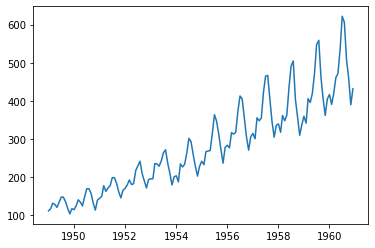

In [11]:
#Visualização da serie temporal em gráfico
plt.plot(st)

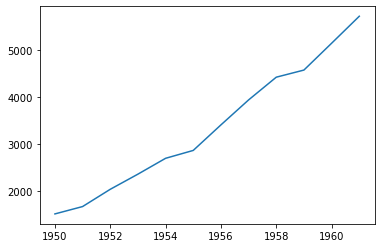

In [12]:
#Visualização por ano da serie temporal
st_ano = st.resample('A').sum()
plt.plot(st_ano)

In [13]:
#Decomposição da serie temporal, criando variavel para cada formato
decomposicao = seasonal_decompose(st)

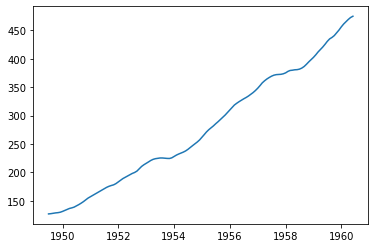

In [14]:
#Criando o formato tendencia e demonstrando graficamente
tendencia = decomposicao.trend
plt.plot(tendencia)

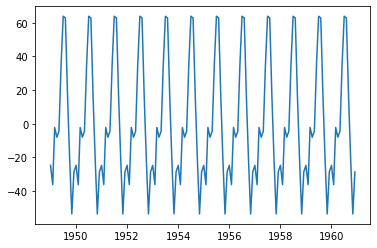

In [15]:
#Criando o formato sazonal e demonstrando graficamente
sazonalidade = decomposicao.seasonal
plt.plot(sazonalidade)

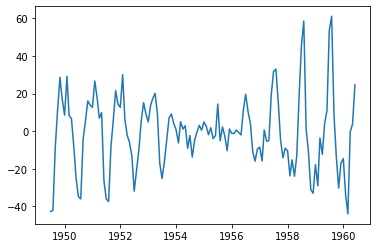

In [16]:
#Criando o formato aleatorio e demonstrando graficamente
aleatorio = decomposicao.resid
plt.plot(aleatorio)

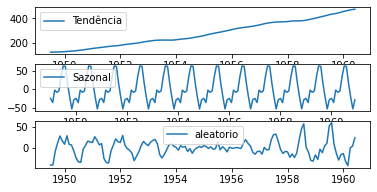

In [17]:
#Visualizano todas juntas

plt.subplot(4,1,1)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc = 'best')

plt.subplot(4,1,2)
plt.plot(sazonalidade, label = 'Sazonal')
plt.legend(loc = 'best')

plt.subplot(4,1,3)
plt.plot(aleatorio, label = 'aleatorio')
plt.legend(loc = 'best')

In [18]:
modelo_auto = auto_arima(st, m = 12, seasonal = True, trace = False)
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Tue, 23 Nov 2021   AIC                           1017.847
Time:                                     10:48:50   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.602      0.000      -1.057      -0.907
sigma2       129.3136     14.557      8.884      0.000     100.783     157.844
===================================================================================
Ljung-Box (Q):                       47.73   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.19   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
#criação do modelo ARIMA com os parâmetros p = 2, q = 1, d = 2 e visualização dos resultados
modelo1 = ARIMA(st, order=(2,1,2), freq=st.index.inferred_freq)
modelo_treino = modelo1.fit()
modelo_treino.summary()

D:\Anaconda3-2021\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
D:\Anaconda3-2021\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 23 Nov 2021   AIC                           1353.347
Time:                        10:48:51   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.059      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.125    -14.799      0.000      -2.087      -1.599
ma.L2          0.9953      0.135      7.375      0.000       0.731       1.260
sigma2       665.9575    114.098      5.837      0.000     442.330     889.585
===================================================================================
Ljung-Box (Q):                      437.49   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.00   Prob(JB):                         0.40
Heteroskedasticity (H):               7.38   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""